# Analisi esplorativa bivariata
## Scaletta
- Analisi di una coppia di variabili categoriche:
  - Tabelle di contingenza
  - Frequenze assolute marginali
  - Frequenze relative marginali
  - Frequenze relative condizionate
- Analisi di una variabile categorica e una variabile numerica:
  - Istogrammi multipli
  - Boxplot raggruppati
- Analisi di due variabili numeriche:
  - Diagramma di dispersione (scatter plot)
  - Coefficiente di correlazione di Pearson

## Preparazione
Carichiamo il dataset della stralugano

In [15]:
import numpy as np
np.set_printoptions(precision=2)
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import pandas as pd
# Riutilizziamo il dataset della stralugano
df=pd.read_csv("stralugano.csv",
               keep_default_na=False)
ore = df["ore"].values
minuti = df["minuti"].values
secondi = df["secondi"].values
decimi = df["decimi"].values
tempo = ore * 60 + minuti + secondi / 60 + decimi / 60 / 10
anno = pd.to_numeric(df["anno"], errors="coerce").values

In [16]:
# Filtro tutti i dati in modo tale da liberarmi dei nan su anno

In [17]:
# Filtro tutti i dati in modo tale da liberarmi dei nan su anno
mask = ~np.isnan(anno) # True dove anno non e' np.nan
tempo = tempo[mask]
anno = anno[mask]
eta = 2018-anno

In [18]:
# Analizziamo l'attributo "provenienza"
provenienza = df["provenienza"].values[mask]


In [19]:
provenienza = df["provenienza"].values[mask]
prov = np.full(provenienza.shape, "", dtype="object")
for i in range(len(prov)):
    if provenienza[i] == "Lugano":
        prov[i] = "Lugano"
    elif provenienza[i].startswith("I-"):
        prov[i] = "Italia"
    else:
        prov[i] = "Altro"
prov

array(['Altro', 'Italia', 'Altro', ..., 'Italia', 'Altro', 'Altro'],
      dtype=object)

In [20]:
# Analizziamo l'attributo "squadra"
provenienza = df["squadra"].values[mask]


In [21]:
squadra = df["squadra"].values[mask]
sq = np.full(provenienza.shape, "", dtype="object")
sq[squadra == ""] = "indipendente"
sq[squadra != ""] = "con squadra"
py.iplot([go.Histogram(x=sq)])

In [22]:
# Dividiamo i corridori in tre gruppi a seconda del tempo

In [23]:
bravura = np.full(tempo.shape, "", dtype="object")
bravura[:] = "scarso"
bravura[tempo<60] = "medio"
bravura[tempo<50] = "veloce"
py.iplot([go.Histogram(x=bravura)])

## Notazione
Consideriamo due variabili $\boldsymbol{a}_j$ e $\boldsymbol{a}_k$.  Abbiamo $m$ osservazioni.
- $\boldsymbol{a}_j = (x_{1j}, x_{2j}, \ldots, x_{mj})$
- $\boldsymbol{a}_k = (x_{1k}, x_{2k}, \ldots, x_{mk})$

Il primo indice di $x$ corrisponde all'osservazione (da $1$ a $m$). Il secondo indice all'attributo ($j$ oppure $k$).

## Due variabili categoriche
Definiamo con $V$ e $U$ il supporto di $\boldsymbol{a}_j$ e $\boldsymbol{a}_k$, rispettivamente (v. lezione sull'analisi univariata).
- $V = \{v_1, v_2, \ldots, v_J\}$
- $U = \{u_1, u_2, \ldots, u_K\}$

Essi hanno rispettivamente cardinalita' $J$ e $K$.

In [24]:
aj = prov
ak = sq
V = np.unique(aj)
J = len(V)
U = np.unique(ak)
K = len(U)
print(f"V = {V}")
print(f"U = {U}")

V = ['Altro' 'Italia' 'Lugano']
U = ['con squadra' 'indipendente']


### Tabella di contingenza

È possibile costruire una tabella di contingenza, costituita da una matrice $T$ con $J$ righe e $K$ colonne, i cui elementi $t_{rs}$ indicano il numero di osservazioni per cui vale che:
$$x_{ij} = v_r$$
$$x_{ik} = u_s$$.

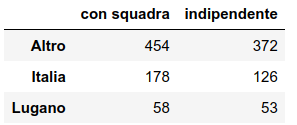

In [25]:
t = np.full((len(V),len(U)), np.nan, dtype=int)
for r in range(len(V)):
    for s in range(len(U)):
        t[r,s] = np.sum((aj==V[r]) & (ak==U[s]))
        print(f"{V[r]:8} {U[s]:12}: {t[r,s]}")
        
t

Altro    con squadra : 454
Altro    indipendente: 372
Italia   con squadra : 178
Italia   indipendente: 126
Lugano   con squadra : 58
Lugano   indipendente: 53


array([[454, 372],
       [178, 126],
       [ 58,  53]])

In [26]:
# Uso questa riga di codice solo per stampare la tabella
pd.DataFrame(t, # dati
             index=V, # intestazioni di riga
             columns=U) # intestazioni di colonna

,con squadra,indipendente
Altro,454,372
Italia,178,126
Lugano,58,53


In [27]:
# rappresentazione tramite bar plot
trace1 = go.Bar(
    x=V,
    y=t[:,0],
    name=U[0]
)
trace2 = go.Bar(
    x=V,
    y=t[:,1],
    name=U[1]
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    xaxis=dict(title="provenienza"),
    yaxis=dict(title="numero di corridori")
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

#### Un altro esempio di tabella di contingenza

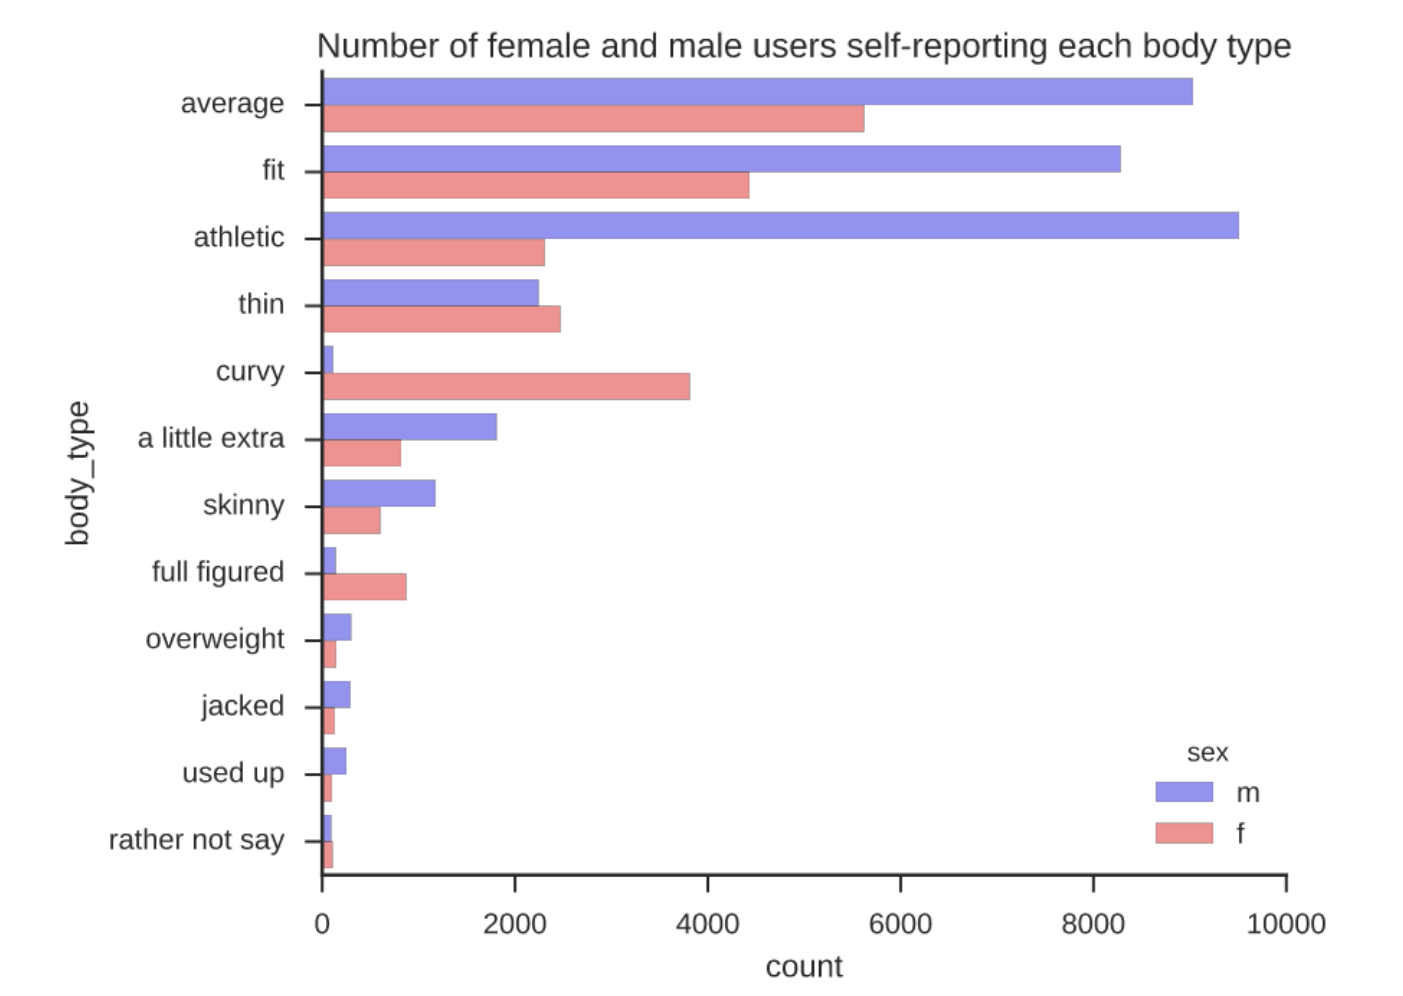

### Frequenze assolute marginali
È possibile calcolare la somma dei valori per ogni riga e per ogni colonna ottenendo le
frequenze assolute marginali:
$$f_r = \sum_{s=1}^{K} t_{rs}$$
$$g_s = \sum_{r=1}^{J} t_{rs}$$

In [28]:
f = np.sum(t, axis=1) # somma lungo il secondo asse (ovvero le colonne): ottieni un elemento per ogni riga
g = np.sum(t, axis=0) # somma lungo il primo asse (le righe): ottieni un elemento per colonna

print(f"Frequenze assolute marginali per riga: {f}")
print(f"Frequenze assolute marginali per colonna: {g}")

Frequenze assolute marginali per riga: [826 304 111]
Frequenze assolute marginali per colonna: [690 551]


### Frequenze relative marginali
Dividendo per il numero totale di osservazioni $m$ otteniamo le frequenze relative marginali

### Frequenze relative condizionate
Dividendo un valore nella tabella di contingenza per la corrispondente frequenza assoluta marginale, otteniamo le frequenze relative condizionate

### Esempio di implementazione

In [29]:
print(t)
f = np.sum(t, axis=1) # somma di ogni riga
print()
print(f)

[[454 372]
 [178 126]
 [ 58  53]]

[826 304 111]


In [30]:
t_cond_rows = np.full(t.shape, np.nan)
for r in range(t.shape[0]): # per ogni riga (indice r)
    for s in range(t.shape[1]): # per ogni colonna (indice s)
        t_cond_rows[r,s] = t[r,s] / f[r]
t_cond_rows

array([[0.55, 0.45],
       [0.59, 0.41],
       [0.52, 0.48]])

In [31]:
# La stessa cosa, ma meglio

# somma di ogni riga, ma ottenendo un array che mantiene il numero di dimensioni di t
f = np.sum(t, axis=1, keepdims=True)
print(f)
print()

# np.tile affianca una matrice a se stessa, come fossero piastrelle (tiles)
f_tiled = np.tile(f, 
    (1,  # Ripetila una sola volta lungo il primo asse (righe) 
     2)  # Ripetila 2 volte lungo il secondo asse (colonne)
)

print(f_tiled)
print()

t_cond_rows = t / f_tiled # divisione elemento per elemento
print(t_cond_rows) 

[[826]
 [304]
 [111]]

[[826 826]
 [304 304]
 [111 111]]

[[0.55 0.45]
 [0.59 0.41]
 [0.52 0.48]]


In [32]:
# Sorpresa: np.tile non era neanche indispensabile
t_cond_rows = t / f # (3 righe 2 colonne) / (3 righe 1 colonna)
print(t_cond_rows)  # Funziona!

[[0.55 0.45]
 [0.59 0.41]
 [0.52 0.48]]


L'ultima cella sopra usa una funzionalita' piuttosto avanzata di numpy, nota come *broadcasting*. [Qui](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) viene spiegato nel dettaglio come funziona.

Utilizziamo questa questa funzionalita' senza accorgercene quando moltiplichiamo un array per uno scalare: lo scalare viene "esteso" alla dimensione dell'array prima della moltiplicazione.  Nel caso della cella sopra, l'array `f` (3 righe 1 colonna) viene automaticamente esteso alla dimensione dell'array `t` (3 righe 2 colonne) facendo implicitamente un'operazione simile a quella implementata da `np.tile`.

Per il corso, non faremo uso del broadcasting molto frequentemente, se non per operazioni tra array e scalari.

## Una variabile numerica, una categorica
Posso raggruppare le mie osservazioni in piu' gruppi a seconda del valore della variabile categorica.  Se la variabile categorica ha un supporto di cardinalita' $K$, questo identifica $K$ sottoinsiemi per la variabile numerica.  Su ciascun sottoinsieme posso fare tutte le analisi che abbiamo visto nella lezione sull'analisi univariata.  Ad esempio, posso comprararne la distribuzione utilizzando statistiche o grafici.  

In [33]:
num = tempo # variabile numerica
cat = prov # variabile categorica

support = np.unique(cat)
for val in support: # per ogni valore che puo' predere la variabile categorica
    num_g = tempo[cat == val] # tempi per le osservazioni corrispondenti
    print(f"I corridori per cui cat = {val} hanno un tempo medio di {np.mean(num_g):.2f} minuti")

I corridori per cui cat = Altro hanno un tempo medio di 53.20 minuti
I corridori per cui cat = Italia hanno un tempo medio di 53.88 minuti
I corridori per cui cat = Lugano hanno un tempo medio di 54.27 minuti


In [34]:
# Rappresentazione come istogrammi
data = []
for val in support:
    num_g = tempo[cat == val] # tempi per le osservazioni corrispondenti
    trace = go.Histogram(x=num_g, name=val)
    data.append(trace)

layout = go.Layout(
    barmode='group',
    xaxis=dict(title="Tempo [minuti]"),
    yaxis=dict(title="Numero corridori"),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [35]:
# Rappresentazione come boxplot
data = []
for val in support:
    num_g = tempo[cat == val] # tempi per le osservazioni corrispondenti
    trace = go.Box(x=num_g, name=val)
    data.append(trace)

layout = go.Layout(
    xaxis=dict(title="Tempo [minuti]"),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Due variabili numeriche
### Diagramma di dispersione (scatter plot)
Uno scatter plot è la rappresentazione grafica più intuitiva del legame esistente tra due attributi numerici.

In [ ]:
data = [go.Scatter(x=eta, y=tempo, mode='markers')]
layout = go.Layout(
    xaxis=dict(title="Eta' [anni]"),
    yaxis=dict(title="Tempo [minuti]"),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Indici di associazione
#### Covarianza
$$\operatorname{Cov}(\boldsymbol{a}_j, \boldsymbol{a}_k) = \frac{1}{m}\sum_{i=1}^{m}(x_{ij}-\bar{x}_j)(x_{ik}-\bar{x}_k)$$
#### Coefficiente di correlazione
$$r^{jk} = \operatorname{Cor}(\boldsymbol{a}_j, \boldsymbol{a}_k) = \frac{\operatorname{Cov}(\boldsymbol{a}_j, \boldsymbol{a}_k)}{\sigma_j \sigma_k}$$

Dove $\sigma_j$ e' la deviazione standard della variabile $\boldsymbol{a}_j$, e $\sigma_k$ e' la deviazione standard della variabile $\boldsymbol{a}_k$.

In [ ]:
cov = np.mean((eta - np.mean(eta)) * (tempo - np.mean(tempo)))
print(cov)

print(np.cov(eta,tempo))
print(np.corrcoef(eta,tempo))

Cosa significa il coefficiente di correlazione?
- $r^{jk} = +1$ indica che c’e’ una relazione lineare perfetta tra le due variabili $\boldsymbol{a}_j$ e $\boldsymbol{a}_k$.  All’aumentare dell’una, aumenta anche l’altra di una quantita’ proporzionale.
- $r^{jk} = -1$ indica una relazione lineare perfetta in cui all’aumentare di una variabile l’altra
diminuisce.
- $0$ indica che non esiste una relazione lineare tra le due variabili.

il coefficiente di correlazione e’ adimensionale

il coefficiente di correlazione e’ simmetrico: $r^{jk} = r^{jk}$

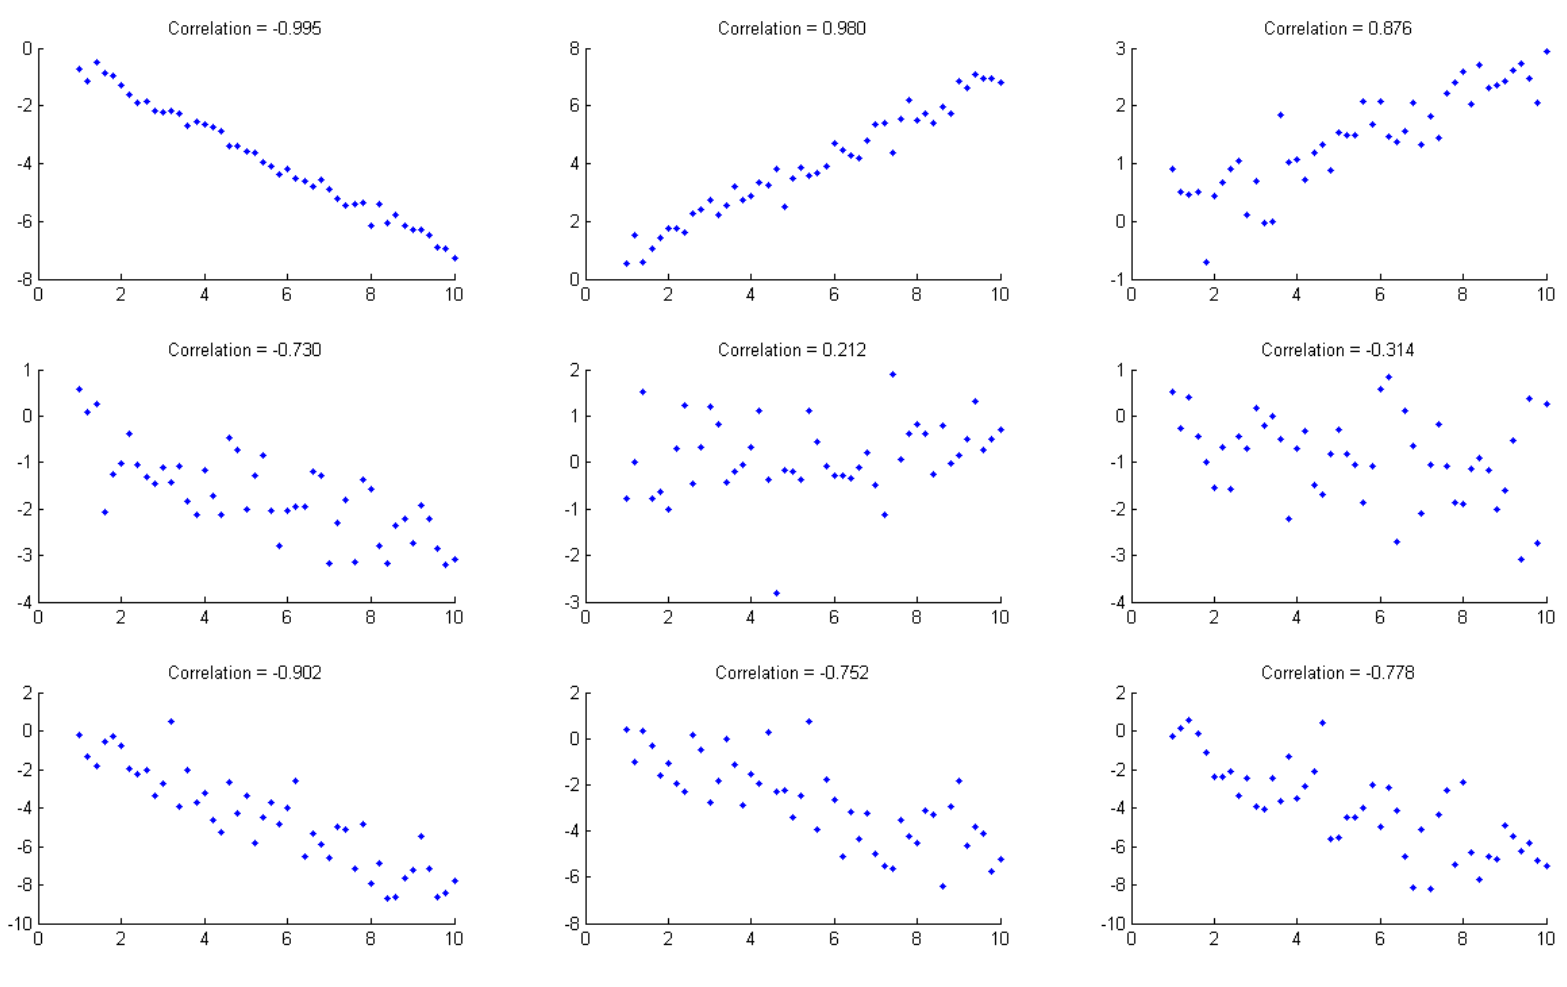

#### Costruiamoci un' intuizione sul significato del coefficiente di correlazione
http://guessthecorrelation.com/

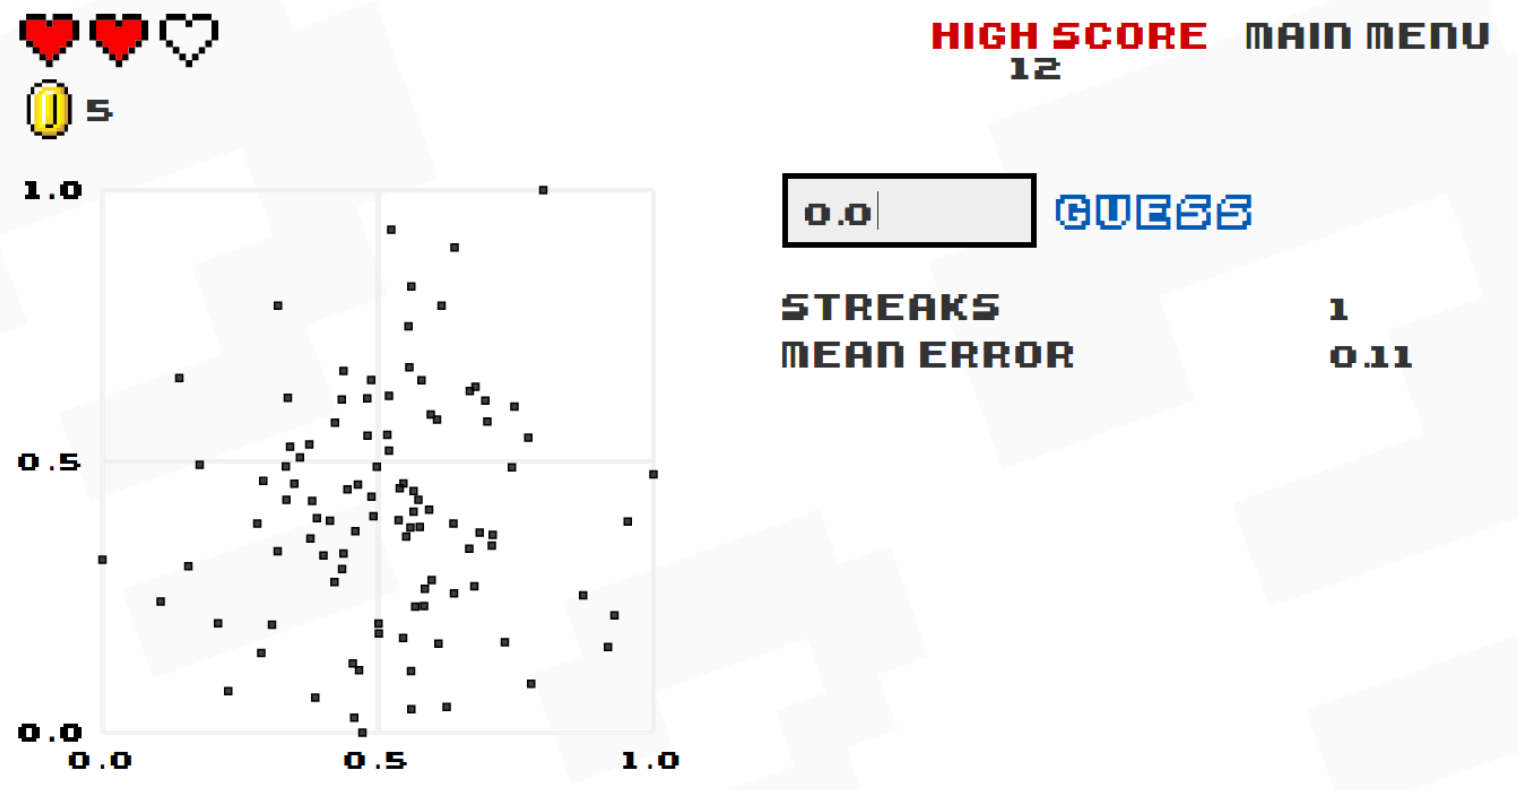

#### Coefficiente di correlazione: caveat importanti
Il coefficiente di correlazione **non dipende dalla pendenza della retta**!

Un coefficiente pari a 0 **non implica che le due variabili non sono correlate**, ma solo che non sono correlate **in modo lineare**.  Potrebbero essere correlate ma in modo non lineare!
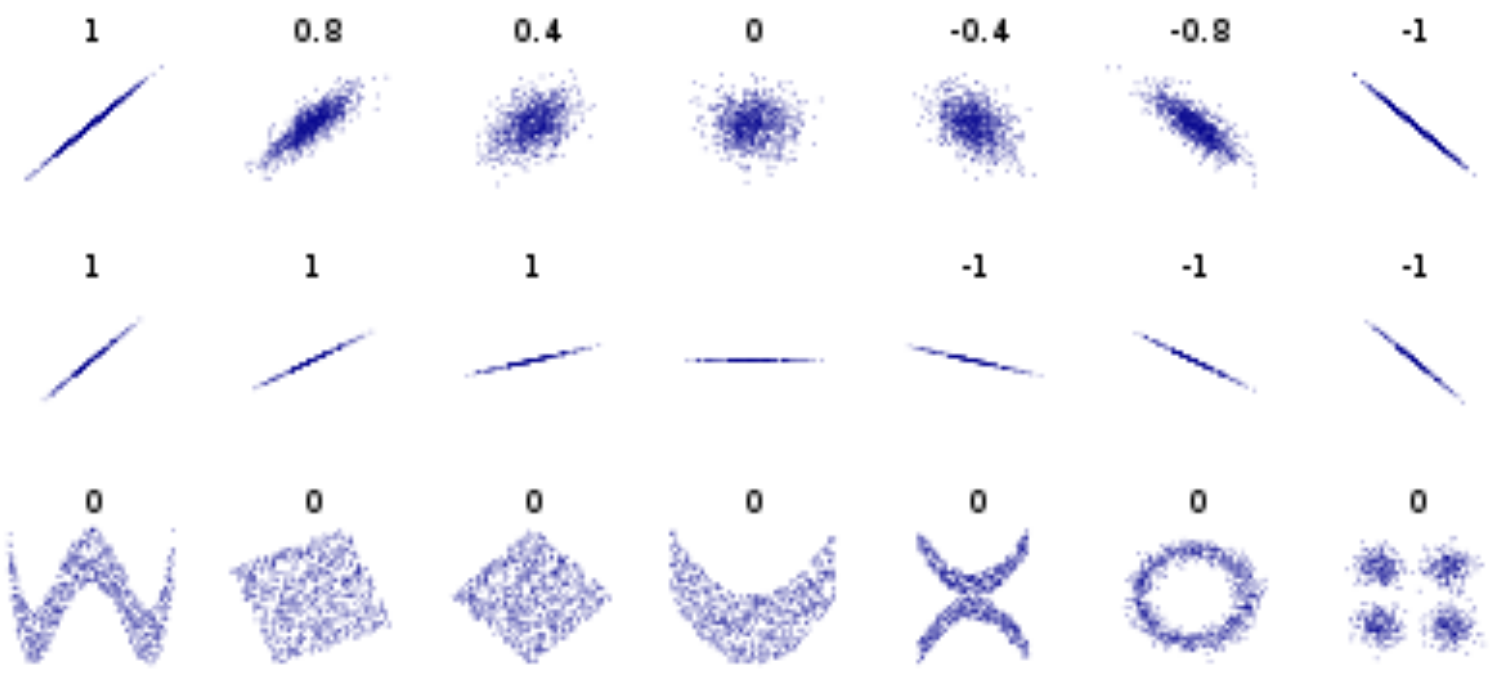

Quattro dataset con lo stesso coefficiente di correlazione: 0.816

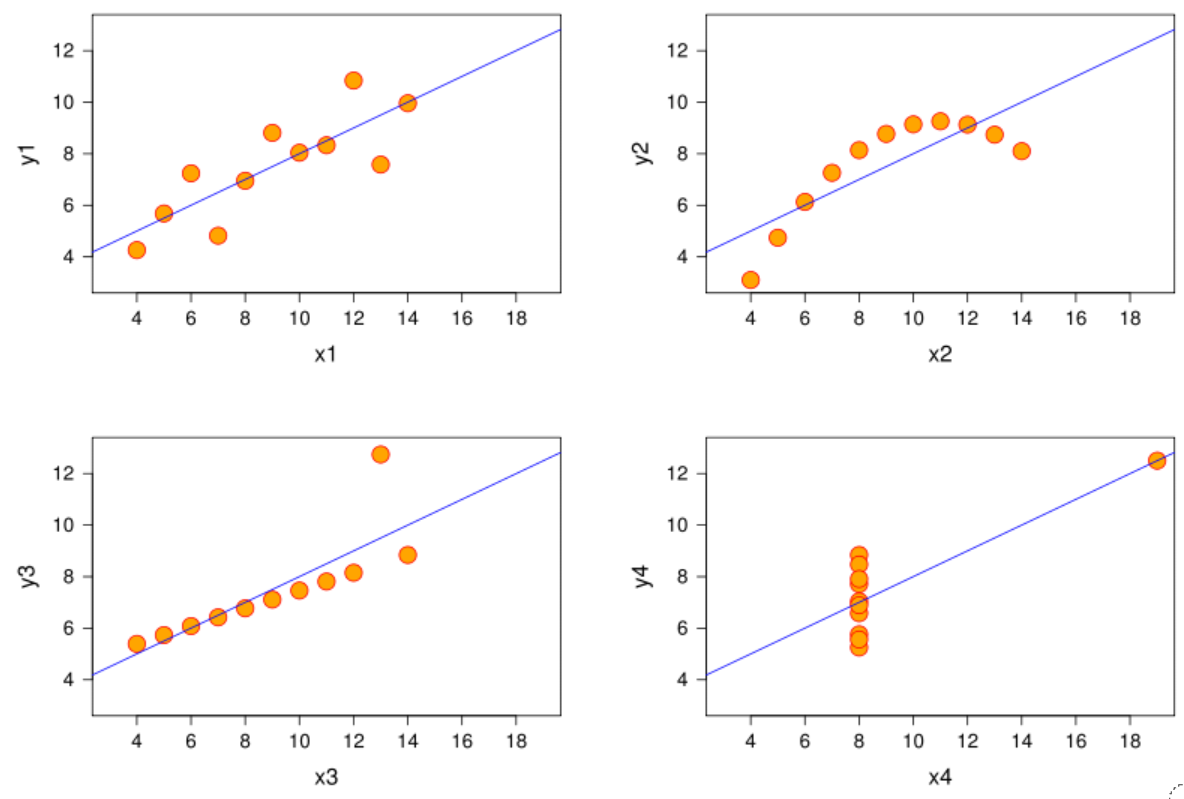

Il coefficiente di correlazione misura solo correlazione lineare, non ci dice nulla su relazioni piu’ complesse
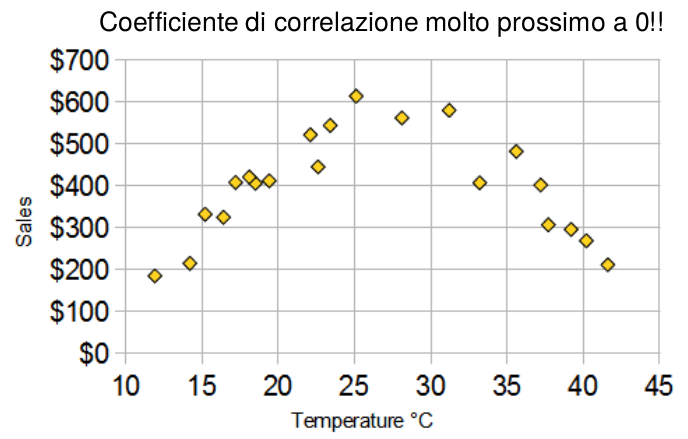

Il coefficiente di correlazione non indica necessariamente un rapporto di causa-effetto!
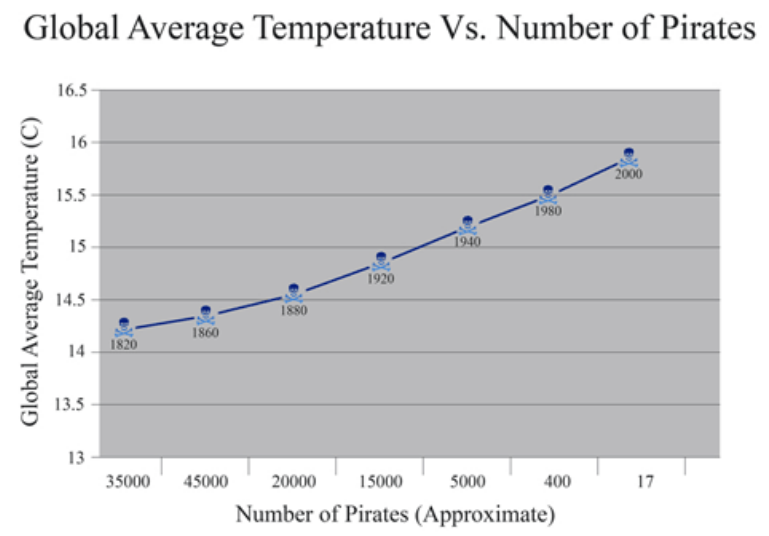

Altre correlazioni spurie:

http://www.tylervigen.com/spurious-correlations
(Attenzione: questi plot NON sono scatter plot!)

### Approfondimento
scatter plot, density plot, marginal histograms
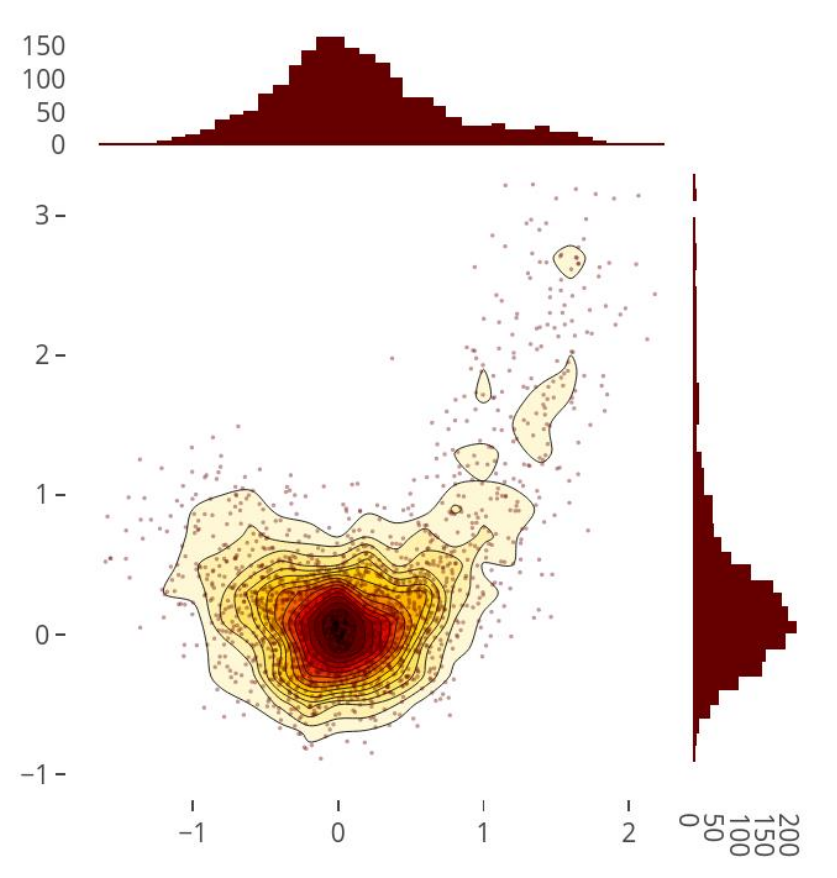